# TITANIC SURVIVORS CLASSIFICATION WITH ANN

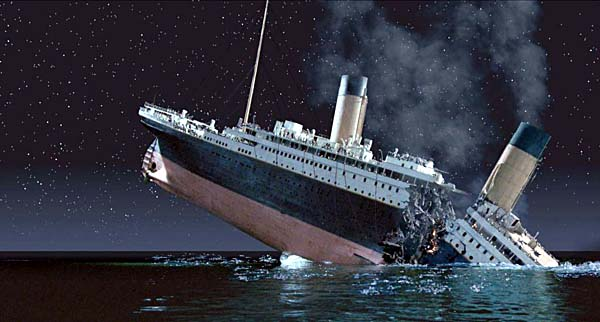

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Data/titanic.csv')

In [3]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
dataset.isnull().values.any()

True

In [26]:
male=dataset[dataset['Sex']=='male']
female=dataset[dataset['Sex']=='female']

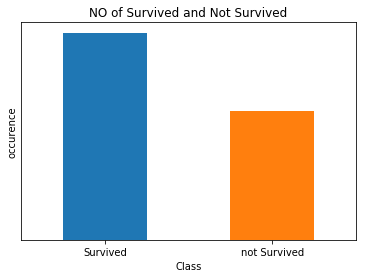

In [39]:
LABELS = ["Survived", "not Survived"]
count_classes = pd.value_counts(dataset['Survived'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("NO of Survived and Not Survived")
plt.xticks(range(2), LABELS)
plt.yticks([])
plt.xlabel("Class")
plt.ylabel("occurence")
plt.show()

In [5]:
categorical_features = dataset.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [6]:
categorical_features_name=['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']

In [7]:
for i in categorical_features_name:
    dataset[i]=dataset[i].fillna("UNKNOWN")

In [8]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  UNKNOWN        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  UNKNOWN        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  UNKNOWN        S

In [10]:
X = dataset.iloc[:, [2,4,5,6,7,9,10,11]].values
y = dataset.iloc[:, 1].values

In [11]:
X[0]

array([3, 'male', 22.0, 1, 0, 7.25, 'UNKNOWN', 'S'], dtype=object)

In [13]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values= 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:,[0,2,3,4,5]])
X[:,[0,2,3,4,5]] = imputer.transform(X[:,[0,2,3,4,5]])

In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 7] = labelencoder_X_3.fit_transform(X[:, 7])
labelencoder_X_4 = LabelEncoder()
X[:, 6] = labelencoder_X_4.fit_transform(X[:, 6])


onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()


X = X[:, 1:]

In [15]:
X[0]

array([   1.  ,    3.  ,   22.  ,    1.  ,    0.  ,    7.25,  147.  ,    2.  ])

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X[0]

array([ 0.73769513,  0.82737724, -0.5924806 ,  0.43279337, -0.47367361,
       -0.50244517,  0.45150219,  0.58111394])

In [18]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
x_train.shape

(712, 8)

In [20]:
y_train.shape

(712,)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 500)

Using TensorFlow backend.


Epoch 1/500
712/712 [==============================] - 10s 15ms/step - loss: 0.6899 - acc: 0.6236
Epoch 2/500
712/712 [==============================] - 0s 535us/step - loss: 0.6749 - acc: 0.6292
Epoch 3/500
712/712 [==============================] - 0s 540us/step - loss: 0.6327 - acc: 0.6292
Epoch 4/500
712/712 [==============================] - 0s 520us/step - loss: 0.5799 - acc: 0.6292
Epoch 5/500
712/712 [==============================] - 0s 583us/step - loss: 0.5507 - acc: 0.6292
Epoch 6/500
712/712 [==============================] - 0s 560us/step - loss: 0.5369 - acc: 0.6292
Epoch 7/500
712/712 [==============================] - 0s 537us/step - loss: 0.5294 - acc: 0.6292
Epoch 8/500
712/712 [==============================] - 0s 532us/step - loss: 0.5245 - acc: 0.7037
Epoch 9/500
712/712 [==============================] - 1s 716us/step - loss: 0.5204 - acc: 0.8062
Epoch 10/500
712/712 [==============================] - 0s 627us/step - loss: 0.5157 - acc: 0.8034
Epoch 11/500
712/71

712/712 [==============================] - 0s 525us/step - loss: 0.4135 - acc: 0.8357
Epoch 166/500
712/712 [==============================] - 0s 506us/step - loss: 0.4136 - acc: 0.8357
Epoch 167/500
712/712 [==============================] - 0s 499us/step - loss: 0.4128 - acc: 0.8315
Epoch 168/500
712/712 [==============================] - 0s 511us/step - loss: 0.4133 - acc: 0.8329
Epoch 169/500
712/712 [==============================] - 0s 563us/step - loss: 0.4132 - acc: 0.8287
Epoch 170/500
712/712 [==============================] - 0s 510us/step - loss: 0.4134 - acc: 0.8287
Epoch 171/500
712/712 [==============================] - 0s 512us/step - loss: 0.4128 - acc: 0.8287
Epoch 172/500
712/712 [==============================] - 1s 710us/step - loss: 0.4130 - acc: 0.8287
Epoch 173/500
712/712 [==============================] - 1s 824us/step - loss: 0.4127 - acc: 0.8343
Epoch 174/500
712/712 [==============================] - 0s 645us/step - loss: 0.4124 - acc: 0.8329
Epoch 175/500


712/712 [==============================] - 0s 631us/step - loss: 0.4102 - acc: 0.8329
Epoch 248/500
712/712 [==============================] - 0s 662us/step - loss: 0.4095 - acc: 0.8357
Epoch 249/500
712/712 [==============================] - 1s 769us/step - loss: 0.4092 - acc: 0.8329
Epoch 250/500
712/712 [==============================] - 0s 665us/step - loss: 0.4087 - acc: 0.8315
Epoch 251/500
712/712 [==============================] - 0s 504us/step - loss: 0.4088 - acc: 0.8301
Epoch 252/500
712/712 [==============================] - 1s 804us/step - loss: 0.4091 - acc: 0.8301
Epoch 253/500
712/712 [==============================] - 1s 777us/step - loss: 0.4087 - acc: 0.8329
Epoch 254/500
712/712 [==============================] - 1s 818us/step - loss: 0.4086 - acc: 0.8343
Epoch 255/500
712/712 [==============================] - 1s 767us/step - loss: 0.4089 - acc: 0.8385
Epoch 256/500
712/712 [==============================] - 1s 793us/step - loss: 0.4088 - acc: 0.8371
Epoch 257/500


712/712 [==============================] - 0s 518us/step - loss: 0.4050 - acc: 0.8343
Epoch 411/500
712/712 [==============================] - 0s 502us/step - loss: 0.4050 - acc: 0.8343
Epoch 412/500
712/712 [==============================] - 0s 506us/step - loss: 0.4046 - acc: 0.8301
Epoch 413/500
712/712 [==============================] - 0s 531us/step - loss: 0.4051 - acc: 0.8343
Epoch 414/500
712/712 [==============================] - 0s 541us/step - loss: 0.4060 - acc: 0.8329
Epoch 415/500
712/712 [==============================] - 0s 507us/step - loss: 0.4054 - acc: 0.8357
Epoch 416/500
712/712 [==============================] - 0s 512us/step - loss: 0.4049 - acc: 0.8343
Epoch 417/500
712/712 [==============================] - 0s 527us/step - loss: 0.4049 - acc: 0.8329
Epoch 418/500
712/712 [==============================] - 0s 509us/step - loss: 0.4048 - acc: 0.8315
Epoch 419/500
712/712 [==============================] - 0s 566us/step - loss: 0.4041 - acc: 0.8343
Epoch 420/500


712/712 [==============================] - 0s 521us/step - loss: 0.4039 - acc: 0.8287
Epoch 493/500
712/712 [==============================] - 0s 529us/step - loss: 0.4030 - acc: 0.8329
Epoch 494/500
712/712 [==============================] - 0s 548us/step - loss: 0.4039 - acc: 0.8272
Epoch 495/500
712/712 [==============================] - 0s 513us/step - loss: 0.4044 - acc: 0.8287
Epoch 496/500
712/712 [==============================] - 0s 508us/step - loss: 0.4039 - acc: 0.8329
Epoch 497/500
712/712 [==============================] - 0s 509us/step - loss: 0.4033 - acc: 0.8329
Epoch 498/500
712/712 [==============================] - 0s 508us/step - loss: 0.4032 - acc: 0.8301
Epoch 499/500
712/712 [==============================] - 0s 517us/step - loss: 0.4034 - acc: 0.8357
Epoch 500/500
712/712 [==============================] - 0s 506us/step - loss: 0.4034 - acc: 0.8315


In [22]:
predict=classifier.predict(x_test)

t=0.7

for i in range(len(predict)):
    if predict[i]>= t:
        predict[i]=1
    else:
        predict[i]=0

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict) 
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :82.1229050279
